In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [63]:
train_data_file = "C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt"
test_data_file =  "C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

In [64]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


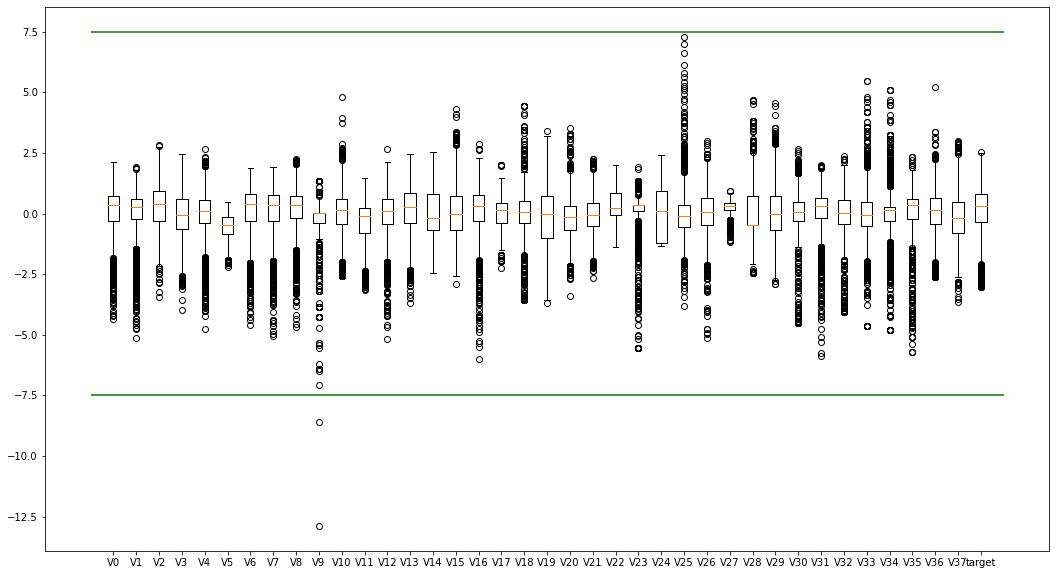

In [65]:
# Draw boxplot to observe the outliers
plt.figure(figsize = (18, 10))
plt.boxplot(x = train_data.values, labels = train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors = 'g')
plt.show()

In [66]:
train_data = train_data[train_data['V9'] > -7.5]
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [67]:
test_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000


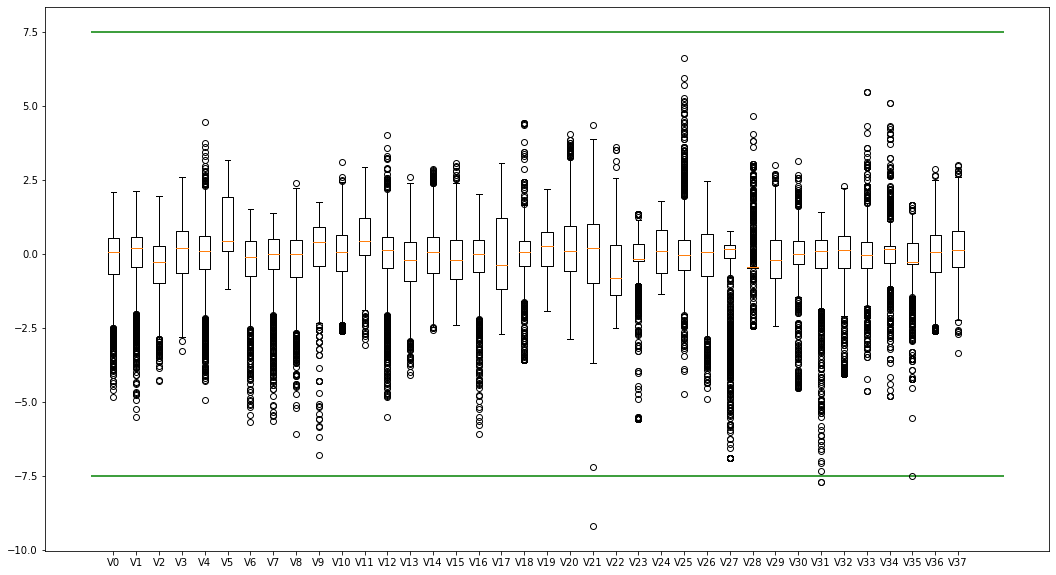

In [68]:
# Draw boxplot to observe the outliers
plt.figure(figsize = (18, 10))
plt.boxplot(x = test_data.values, labels = test_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors = 'g')
plt.show()

In [69]:
# minMax scale
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

In [70]:
train_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [71]:
test_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.871534,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.120675,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.034142,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.794789,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.888889,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.948727,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.051273,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


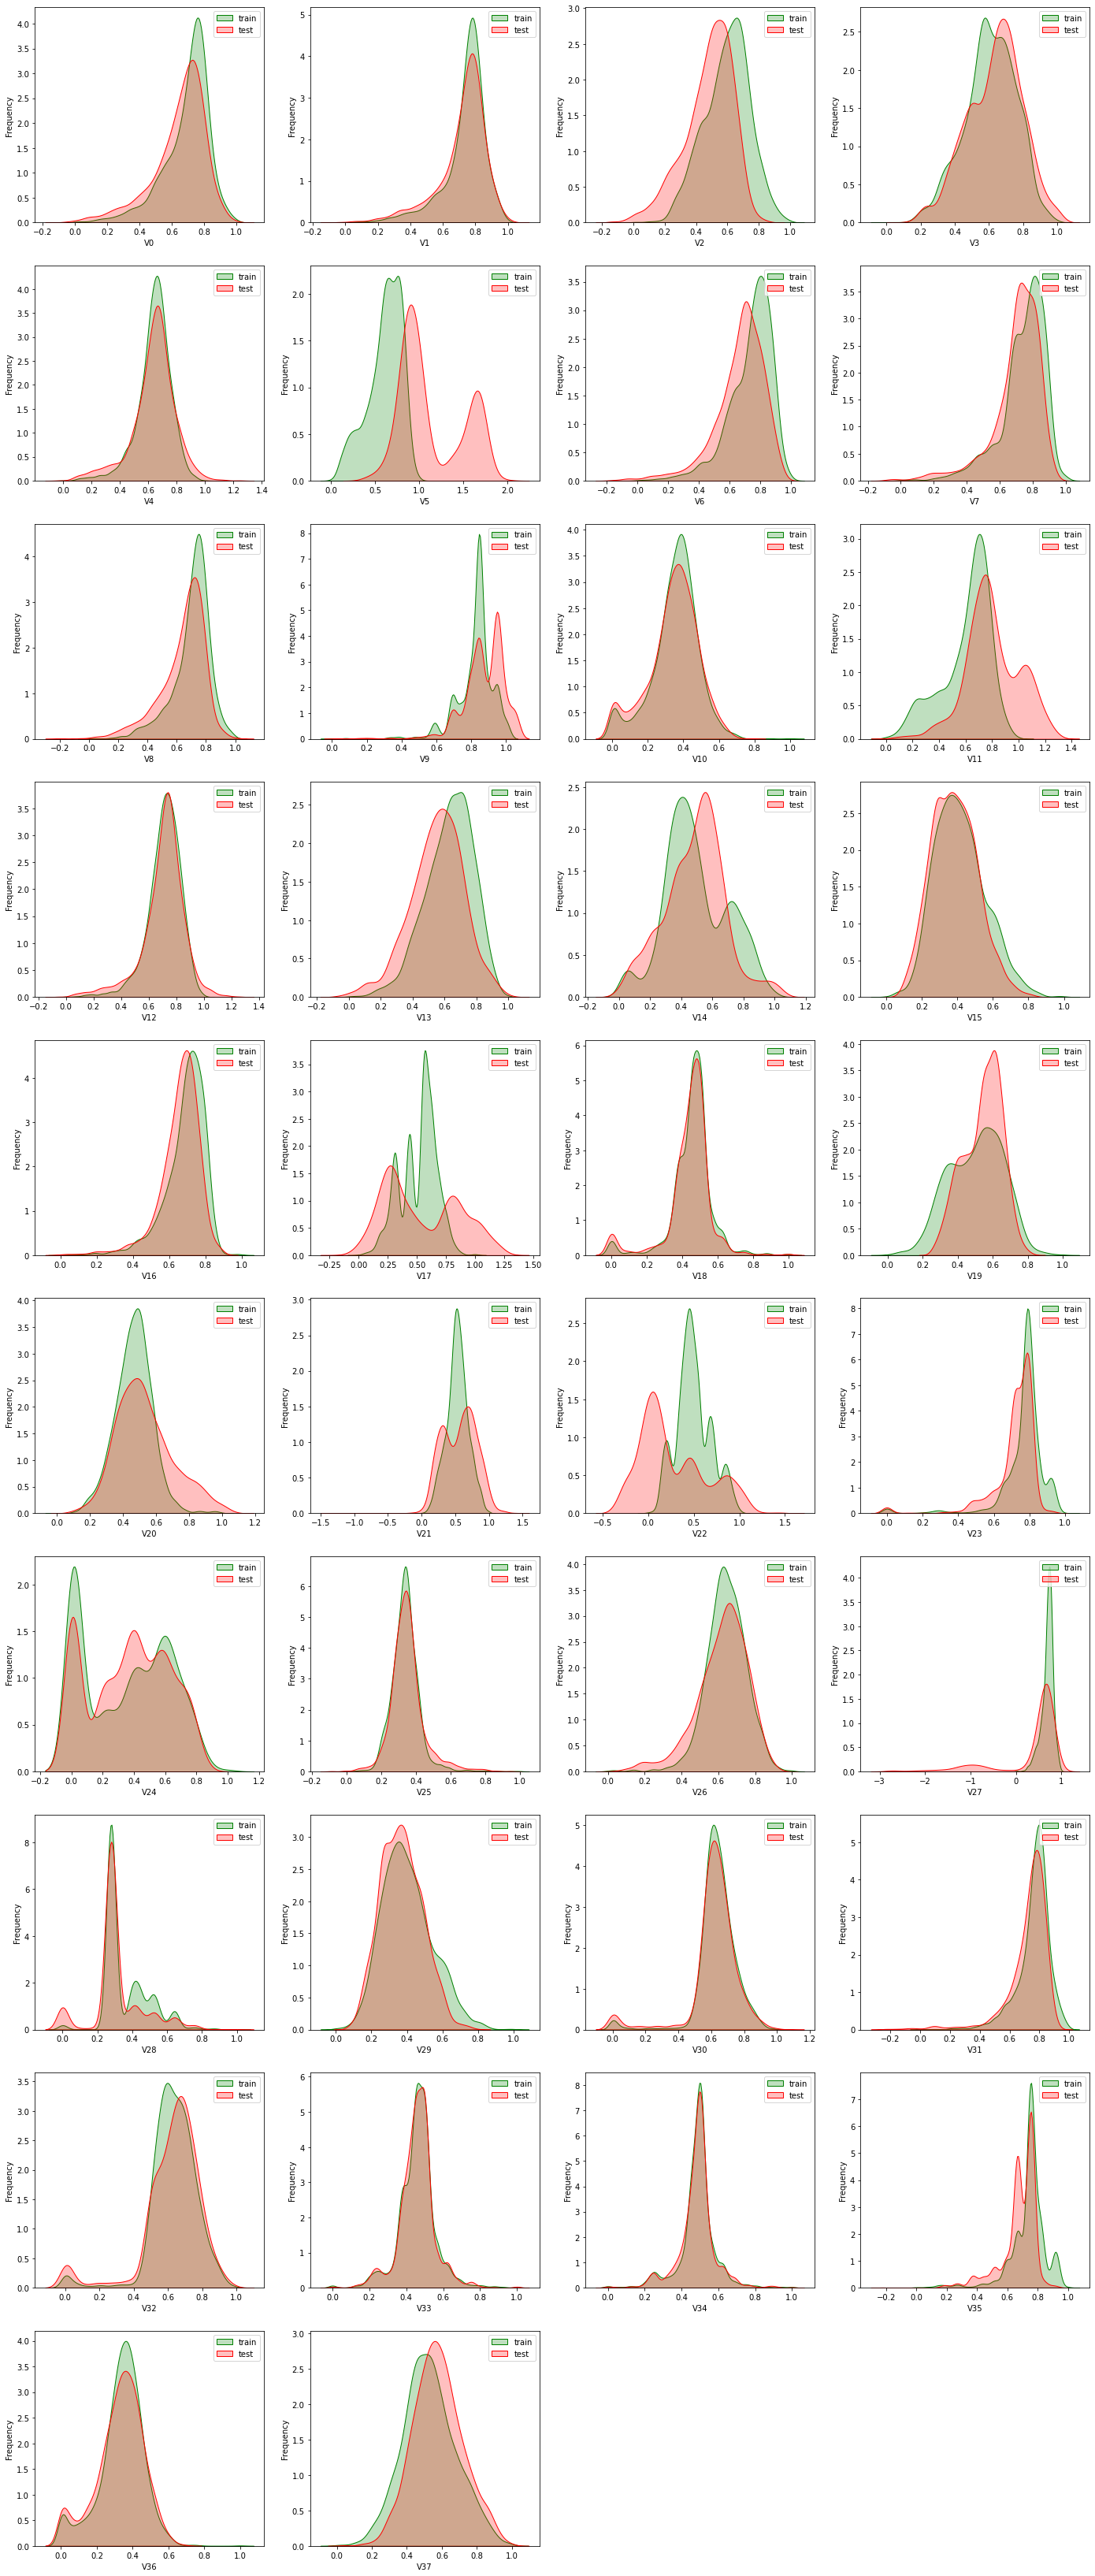

In [72]:
dist_cols = 4
dist_rows = len(test_data_scaler.columns)

plt.figure(figsize = (6 * dist_cols, 6 * dist_rows))


for i, col in enumerate(test_data_scaler.columns):
    ax = plt.subplot(dist_rows, dist_cols, i + 1)
    ax = sns.kdeplot(train_data_scaler[col], color="green", shade = True)
    ax = sns.kdeplot(test_data_scaler[col], color="red", shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train", "test"])
 
plt.show()

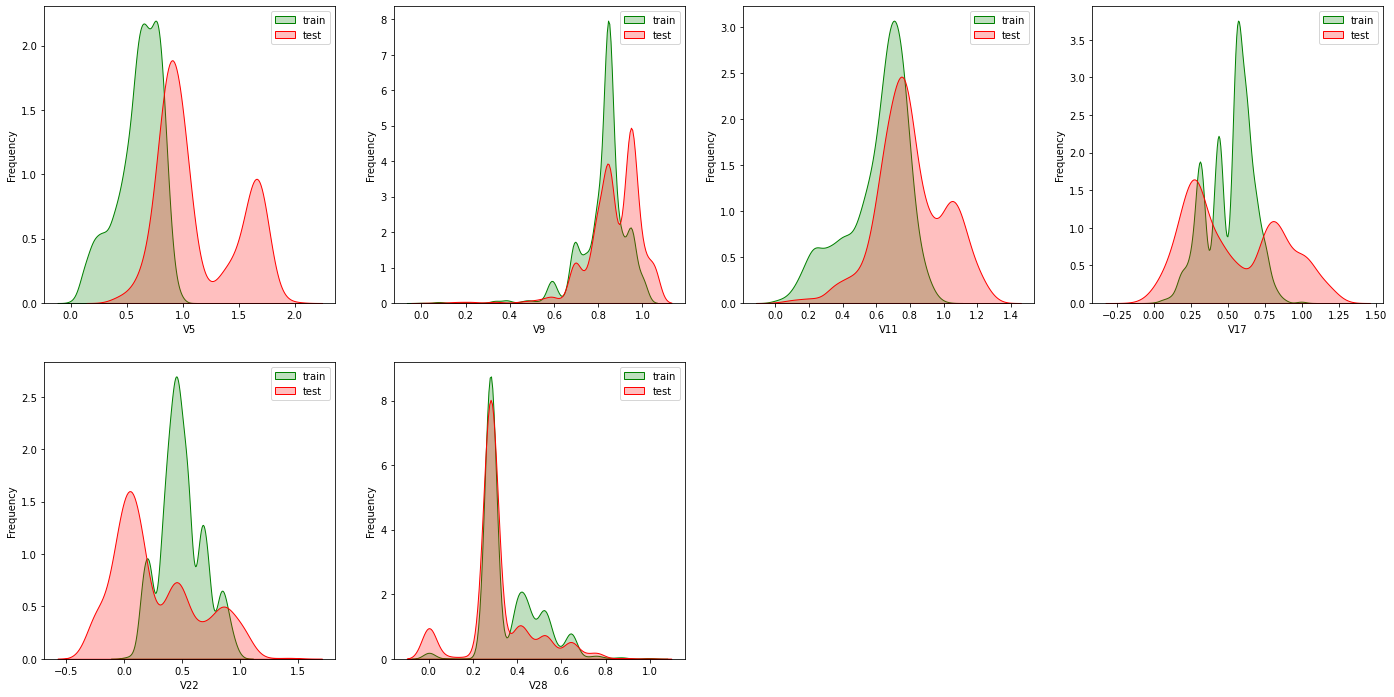

In [73]:
drop_col = 4
drop_row = 2

plt.figure(figsize = (6 * drop_col, 6 * drop_row))

for i, col in enumerate(["V5","V9","V11","V17","V22","V28"]):
    ax = plt.subplot(drop_row,drop_col, i + 1)
    ax = sns.kdeplot(train_data_scaler[col], color = "green", shade = True)
    ax = sns.kdeplot(test_data_scaler[col], color = "red", shade = True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
plt.show()

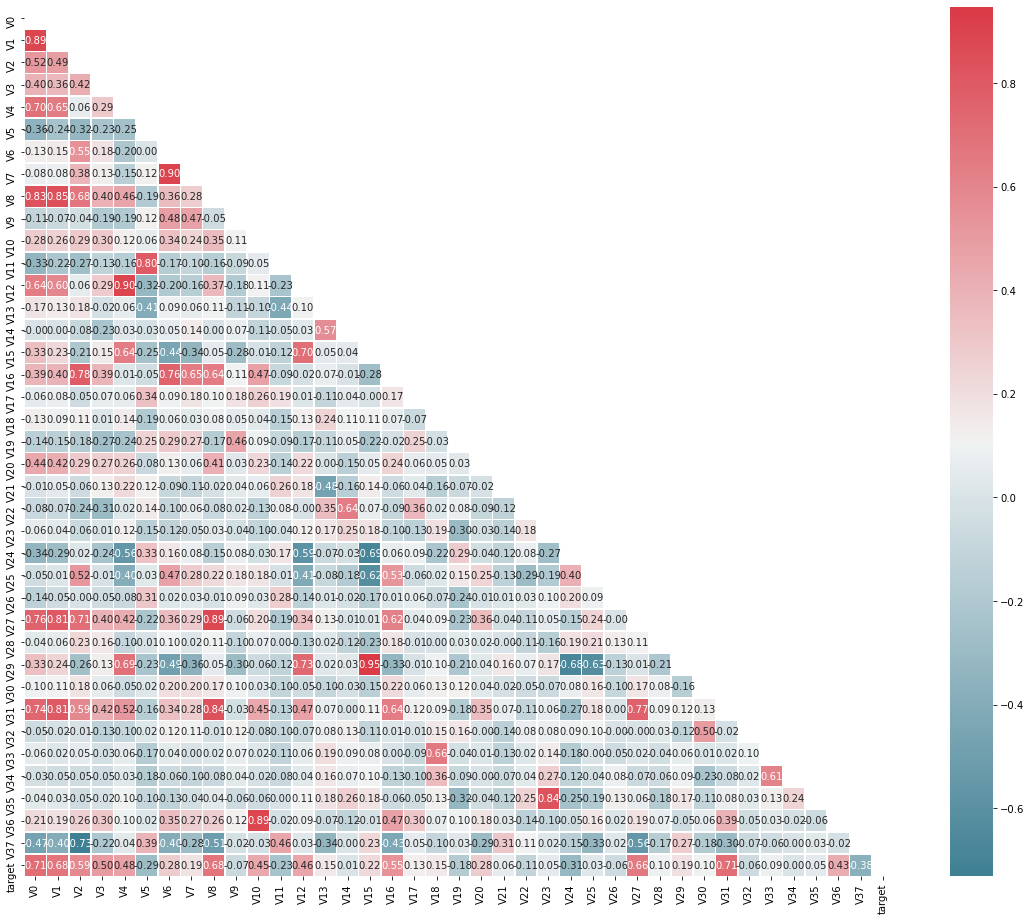

In [74]:
plt.figure(figsize = (20, 16))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method = "spearman")
mask = np.zeros_like(mcorr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)
g = sns.heatmap(mcorr, mask = mask, cmap = cmap, square = True, linewidths = .5, annot = True, fmt = '0.2f')
plt.show()

In [75]:
# correlation analysis
mcorr = mcorr.abs()
numerical_corr = mcorr[mcorr['target'] > 0.1]['target']
print(numerical_corr.sort_values(ascending = False))

index0 = numerical_corr.sort_values(ascending = False).index
print(train_data_scaler[index0].corr('spearman'))

target    1.000000
V0        0.712403
V31       0.711636
V1        0.682909
V8        0.679469
V27       0.657398
V2        0.585850
V16       0.545793
V3        0.501622
V4        0.478683
V12       0.460300
V10       0.448682
V36       0.425991
V37       0.376443
V24       0.305526
V5        0.286076
V6        0.280195
V20       0.278381
V11       0.234551
V15       0.221290
V29       0.190109
V7        0.185321
V19       0.180111
V18       0.149741
V13       0.149199
V17       0.126262
V22       0.112743
V30       0.101378
Name: target, dtype: float64
          target        V0       V31        V1        V8       V27        V2  \
target  1.000000  0.712403  0.711636  0.682909  0.679469  0.657398  0.585850   
V0      0.712403  1.000000  0.739116  0.894116  0.832151  0.763128  0.516817   
V31     0.711636  0.739116  1.000000  0.807585  0.841469  0.765750  0.589890   
V1      0.682909  0.894116  0.807585  1.000000  0.849034  0.807102  0.490239   
V8      0.679469  0.832151  0.841469  0

In [76]:
# filter the features that have correlation coefficient larger than the threshold 0.3
features_corr = numerical_corr.sort_values(ascending = False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr'] > 0.3]
print(features_corr_select)
select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
new_train_data_corr_select = train_data_scaler[select_features + ['target']]
new_test_data_corr_select = test_data_scaler[select_features]

   features_and_target      corr
0               target  1.000000
1                   V0  0.712403
2                  V31  0.711636
3                   V1  0.682909
4                   V8  0.679469
5                  V27  0.657398
6                   V2  0.585850
7                  V16  0.545793
8                   V3  0.501622
9                   V4  0.478683
10                 V12  0.460300
11                 V10  0.448682
12                 V36  0.425991
13                 V37  0.376443
14                 V24  0.305526


In [77]:
# Multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

new_numerical = ['V0', 'V2', 'V3', 'V4', 'V5', 'V6', 'V10','V11', 
               'V13', 'V15', 'V16', 'V18', 'V19', 'V20', 'V22','V24','V30', 'V31', 'V37']
X = np.matrix(train_data_scaler[new_numerical])
VIF_list = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[216.73387180903222,
 114.38118723828812,
 27.863778129686356,
 201.96436579080174,
 78.93722825798903,
 151.06983667656212,
 14.519604941508451,
 82.69750284665385,
 28.479378440614585,
 27.759176471505945,
 526.6483470743831,
 23.50166642638334,
 19.920315849901424,
 24.640481765008683,
 11.816055964845381,
 4.958208708452915,
 37.09877416736591,
 298.26442986612767,
 47.854002539887034]

In [78]:
# Dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.transform(test_data_scaler)
new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)
new_train_pca_90['target'] = train_data_scaler['target']


In [79]:
new_train_pca_90.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,1.636627e-17,-1.324689e-16,1.409899e-17,1.479143e-17,6.216633e-17,-7.522665e-17,-1.170908e-17,4.280668e-17,-4.976961e-17,9.952480e-17,9.272295e-18,1.107771e-16,-8.429578e-18,-3.471851e-17,-1.436587e-19,1.190263e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,1.368790e-01,1.286192e-01,1.193301e-01,1.149758e-01,1.133507e-01,1.019259e-01,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,-6.341045e-01,-5.906753e-01,-4.175153e-01,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,-8.202809e-02,-7.721868e-02,-7.139961e-02,-7.474073e-02,-7.709743e-02,-6.603914e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,7.286444e-03,-5.745946e-03,-4.140670e-03,1.054915e-03,-1.758387e-03,-7.533392e-04,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,8.833765e-02,7.148033e-02,6.786199e-02,7.574868e-02,7.116829e-02,6.357449e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,6.405187e-01,6.780732e-01,5.156118e-01,4.978126e-01,4.673189e-01,4.570870e-01,2.538000


In [80]:
train_data_scaler.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2884.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.127274
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.983462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.348500
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.313000
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.794250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [81]:
# keep 21 components
pca = PCA(n_components = 0.95)
new_train_pca_21 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_21 = pca.transform(test_data_scaler)
new_train_pca_21 = pd.DataFrame(new_train_pca_21)
new_test_pca_21 = pd.DataFrame(new_test_pca_21)
new_train_pca_21['target'] = train_data_scaler['target']
new_train_pca_21.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,target
count,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,...,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2.886000e+03,2884.000000
mean,1.636627e-17,-1.324689e-16,1.409899e-17,1.479143e-17,6.216633e-17,-7.522665e-17,-1.170908e-17,4.280668e-17,-4.976961e-17,9.952480e-17,...,-8.429578e-18,-3.471851e-17,-1.436587e-19,1.190263e-16,2.878463e-17,3.648810e-17,6.994193e-18,3.868566e-17,-1.306224e-16,0.127274
std,3.998976e-01,3.500240e-01,2.938631e-01,2.728023e-01,2.077128e-01,1.951842e-01,1.877104e-01,1.607670e-01,1.512707e-01,1.443772e-01,...,1.193301e-01,1.149758e-01,1.133507e-01,1.019259e-01,9.617307e-02,9.205940e-02,8.423171e-02,8.295263e-02,7.696785e-02,0.983462
min,-1.071795e+00,-9.429479e-01,-9.948314e-01,-7.103087e-01,-7.703987e-01,-5.340294e-01,-5.993766e-01,-5.870755e-01,-6.282818e-01,-4.902583e-01,...,-4.175153e-01,-4.310613e-01,-4.170535e-01,-3.601627e-01,-3.432530e-01,-3.530609e-01,-3.908328e-01,-3.089560e-01,-2.867812e-01,-3.044000
25%,-2.804085e-01,-2.613727e-01,-2.090797e-01,-1.945196e-01,-1.315620e-01,-1.264097e-01,-1.236360e-01,-1.016452e-01,-9.662098e-02,-9.297088e-02,...,-7.139961e-02,-7.474073e-02,-7.709743e-02,-6.603914e-02,-6.064846e-02,-6.247177e-02,-5.357475e-02,-5.279870e-02,-4.930849e-02,-0.348500
50%,-1.417104e-02,-1.277241e-02,2.112166e-02,-2.337401e-02,-5.122797e-03,-1.355336e-02,-1.747870e-04,-4.656359e-03,2.572054e-03,-1.479172e-03,...,-4.140670e-03,1.054915e-03,-1.758387e-03,-7.533392e-04,-4.559279e-03,-2.317781e-03,-3.034317e-04,3.391130e-03,-1.703944e-03,0.313000
75%,2.287306e-01,2.317720e-01,2.069571e-01,1.657590e-01,1.281660e-01,9.993122e-02,1.272081e-01,9.657222e-02,1.002626e-01,9.059634e-02,...,6.786199e-02,7.574868e-02,7.116829e-02,6.357449e-02,5.732624e-02,6.139602e-02,5.068802e-02,5.084688e-02,4.693391e-02,0.794250
max,1.597730e+00,1.382802e+00,1.010250e+00,1.448007e+00,1.034061e+00,1.358962e+00,6.191589e-01,7.370089e-01,6.449125e-01,5.839586e-01,...,5.156118e-01,4.978126e-01,4.673189e-01,4.570870e-01,5.153325e-01,3.556862e-01,4.709891e-01,3.677911e-01,3.663361e-01,2.538000


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [83]:
# apply pca to keep 21 components
new_train_pca_21 = new_train_pca_21.fillna(0)
train = new_train_pca_21[new_test_pca_21.columns]
target = new_train_pca_21['target']

# split the data
train_data, test_data, train_target, test_target = \
train_test_split(train, target, test_size = 0.2, random_state = 0)

In [84]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,...,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,0.004109,-0.004431,-0.006285,-0.000948,0.000495,-0.001339,-0.000243,0.001583,-0.000587,0.000510,...,0.001458,0.001963,-0.000287,0.000514,-0.002431,-0.000857,0.000782,-0.001644,0.000527,-0.000025
std,0.393479,0.350084,0.294942,0.275383,0.207767,0.195027,0.188554,0.161559,0.150371,0.144925,...,0.128600,0.119398,0.115631,0.113411,0.101146,0.095920,0.093058,0.083724,0.083080,0.077146
min,-0.991960,-0.942948,-0.918965,-0.710309,-0.770399,-0.534029,-0.592817,-0.587076,-0.628282,-0.483823,...,-0.590675,-0.417515,-0.431061,-0.417053,-0.360163,-0.327329,-0.353061,-0.390833,-0.294778,-0.286781
25%,-0.275991,-0.263733,-0.216895,-0.198347,-0.131603,-0.127561,-0.127822,-0.100138,-0.097694,-0.093312,...,-0.076839,-0.069725,-0.075926,-0.076862,-0.068928,-0.062880,-0.062440,-0.054763,-0.052620,-0.050688
50%,-0.008831,-0.013598,0.015345,-0.027741,-0.001659,-0.015861,-0.000714,-0.002580,0.001230,0.000515,...,-0.003634,-0.002794,-0.000553,0.000446,-0.003313,-0.005235,-0.002115,-0.001286,0.005118,-0.001918
75%,0.230872,0.229735,0.202408,0.169310,0.128648,0.095969,0.130395,0.100304,0.100352,0.091830,...,0.072676,0.069103,0.076977,0.071168,0.062756,0.056372,0.061568,0.049251,0.051588,0.047175
max,1.597384,1.382802,1.010250,1.448007,1.027718,1.355183,0.619159,0.737009,0.644912,0.583959,...,0.678073,0.515612,0.497813,0.467319,0.416284,0.515332,0.355686,0.455095,0.328564,0.366336


In [85]:
test_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,-0.016409,0.017694,0.025098,0.003785,-0.001977,0.005347,0.000972,-0.006320,0.002343,-0.002037,...,-0.005823,-0.007839,0.001146,-0.002053,0.009707,0.003424,-0.003124,0.006563,-0.002105,0.000100
std,0.424521,0.349526,0.288402,0.262441,0.207665,0.195890,0.184461,0.157542,0.154920,0.142275,...,0.128643,0.118840,0.112412,0.113184,0.104509,0.097186,0.087969,0.085989,0.082480,0.076320
min,-1.071795,-0.716336,-0.994831,-0.664786,-0.639540,-0.474532,-0.599377,-0.583494,-0.458190,-0.490258,...,-0.435230,-0.353999,-0.374144,-0.358284,-0.335085,-0.343253,-0.329090,-0.248575,-0.308956,-0.283353
25%,-0.305297,-0.243624,-0.189735,-0.191816,-0.131372,-0.116940,-0.113812,-0.106529,-0.089997,-0.090053,...,-0.078378,-0.079539,-0.071152,-0.077998,-0.057503,-0.050343,-0.062660,-0.046704,-0.056293,-0.043754
50%,-0.044082,-0.009639,0.053059,-0.009274,-0.020314,-0.005620,0.003189,-0.009043,0.005342,-0.008852,...,-0.012980,-0.013100,0.004987,-0.008526,0.006621,-0.002298,-0.003057,0.006296,0.000319,-0.001034
75%,0.208510,0.236268,0.224980,0.154770,0.124321,0.111629,0.112524,0.088164,0.099748,0.083526,...,0.064855,0.058008,0.074377,0.071416,0.072613,0.061304,0.059725,0.059072,0.047718,0.046754
max,1.597730,1.243174,0.816443,0.886745,1.034061,1.358962,0.514970,0.556466,0.501852,0.580575,...,0.599962,0.378865,0.357146,0.455547,0.457087,0.377142,0.253656,0.470989,0.367791,0.252977


In [86]:
# Linear regression
clf = LinearRegression()
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("LinearRegression:   ", score)

LinearRegression:    0.2642337917628173


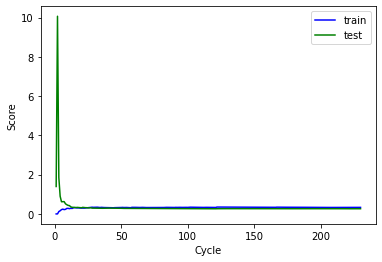

In [87]:
train_score = []
test_score = []

# increase the amount of data, see the change of the modeling performance
for i in range(10, len(train_data) + 1, 10):
    lin_reg = LinearRegression()
    lin_reg.fit(train_data[:i], train_target[:i])
    
    y_train_predict = lin_reg.predict(train_data[:i])
    train_score.append(mean_squared_error(train_target[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(test_data)
    test_score.append(mean_squared_error(test_target, y_test_predict))
    
plt.plot([i for i in range(1, len(train_score) + 1)], train_score, label = 'train', color = "b")
plt.plot([i for i in range(1, len(test_score) + 1)], test_score, label = 'test', color = "g")
plt.xlabel("Cycle")
plt.ylabel("Score")
plt.legend()
plt.show()

KNeighborsRegressor 2 neighbors:  0.29769885683391006
KNeighborsRegressor 3 neighbors:  0.27619208861976163
KNeighborsRegressor 4 neighbors:  0.2597627823313149
KNeighborsRegressor 5 neighbors:  0.2628212724567474
KNeighborsRegressor 6 neighbors:  0.26670982271241833
KNeighborsRegressor 7 neighbors:  0.26596039050914483
KNeighborsRegressor 8 neighbors:  0.2635369464478806
KNeighborsRegressor 9 neighbors:  0.2673470579477979
KNeighborsRegressor 10 neighbors:  0.2668913666608997
KNeighborsRegressor 11 neighbors:  0.2748633904458234
KNeighborsRegressor 12 neighbors:  0.2781442100273933
KNeighborsRegressor 13 neighbors:  0.2861662923670687
KNeighborsRegressor 14 neighbors:  0.2863297463985594
KNeighborsRegressor 15 neighbors:  0.2832436418069973
KNeighborsRegressor 16 neighbors:  0.28526766988132574
KNeighborsRegressor 17 neighbors:  0.2867690701200895
KNeighborsRegressor 18 neighbors:  0.2869679532177795
KNeighborsRegressor 19 neighbors:  0.2861582091604444


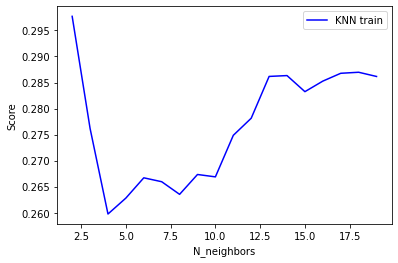

In [88]:
# KNN model
KNNscore = []
for i in range(2, 20):
    clf = KNeighborsRegressor(n_neighbors = i)
    clf.fit(train_data, train_target)
    score = mean_squared_error(test_target, clf.predict(test_data))
    KNNscore.append([i, score])
    print("KNeighborsRegressor " + str(i) + " neighbors: ", score)
plt.plot([KNNscore[i][0] for i in range(len(KNNscore))], [KNNscore[i][1] for i in range(len(KNNscore))], label = 'KNN train', color = "b")
plt.xlabel("N_neighbors")
plt.ylabel("Score")
plt.legend()
plt.show()

In [89]:
# Decision tree model
clf = DecisionTreeRegressor() 
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("DecisionTreeRegressor:   ", score)

DecisionTreeRegressor:    0.5973905570934256


In [90]:
# Random forest model with 200 trees
clf = RandomForestRegressor(n_estimators = 200)
clf.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("RandomForestRegressor:   ", score)

RandomForestRegressor:    0.24969637506911765


In [91]:
from sklearn.ensemble import GradientBoostingRegressor

myGBR = GradientBoostingRegressor(alpha = 0.9, criterion = 'friedman_mse', init = None,
                                  learning_rate = 0.03, loss = 'huber', max_depth = 14,
                                  max_features = 'sqrt', max_leaf_nodes = None,
                                  min_impurity_decrease = 0.0, min_impurity_split = None,
                                  min_samples_leaf = 10, min_samples_split = 40,
                                  min_weight_fraction_leaf = 0.0, n_estimators = 300,
                                  random_state = 10, subsample = 0.8, verbose = 0,
                                  warm_start = False)
myGBR.fit(train_data, train_target)
score = mean_squared_error(test_target, clf.predict(test_data))
print("GradientBoostingRegressor:   ", score)


GradientBoostingRegressor:    0.24969637506911765


In [95]:
train_data_file = "C:/Users/Stille/Desktop/ML projects/zhengqi_train.txt"
test_data_file =  "C:/Users/Stille/Desktop/ML projects/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep = '\t', encoding = 'utf-8')
test_data = pd.read_csv(test_data_file, sep = '\t', encoding = 'utf-8')

In [96]:
import math
epsilon = 1e-5

# feature transformations
func_dict1 = {
            'add': lambda x, y: x + y,
            'mins': lambda x, y: x - y,
            'div': lambda x, y: x / (y + epsilon),
            'multi': lambda x, y: x * y,
            }

func_dict2 = {
            "square": lambda x: x ** 2,
            "cube": lambda x: x ** 3
            }

In [97]:
# generate more features
def auto_features_make(train_data, test_data, func_dict1, func_dict2, col_list):
    train_data, test_data = train_data.copy(), test_data.copy()
    for col_i in col_list:
        for col_j in col_list:
            for func_name, func in func_dict1.items():
                for data in [train_data, test_data]:
                    func_features = func(data[col_i], data[col_j])
                    col_func_features = '-'.join([col_i, func_name, col_j])
                    data[col_func_features] = func_features
    
    for col_i in col_list:
        for func_name, func in func_dict2.items():
            for data in [train_data, test_data]:
                func_features = func(data[col_i])
                col_func_features = '-'.join([func_name, col_i])
                data[col_func_features] = func_features
    return train_data, test_data

In [98]:
train_data2, test_data2 = auto_features_make(train_data, test_data, func_dict1, func_dict2,col_list=test_data.columns)

In [99]:
train_data2.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,square-V33,cube-V33,square-V34,cube-V34,square-V35,cube-V35,square-V36,cube-V36,square-V37,cube-V37
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,1.013749,-0.036096,1.006289,-0.436607,1.010329,-1.439551,0.943090,-0.455456,1.051315,-0.251856
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,2.449647,10.032785,2.655272,10.968231,2.815806,12.835850,1.621422,4.903060,1.453538,3.935319
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,0.000004,-99.060040,0.000001,-109.833421,0.000064,-184.706077,0.000001,-17.738740,0.000000,-47.832147
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,0.036100,-0.124251,0.025600,-0.024389,0.132496,-0.008315,0.066435,-0.070445,0.104814,-0.508648
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,0.249001,-0.000064,0.084100,0.004096,0.132496,0.048229,0.297025,0.002572,0.469225,-0.006383
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.710649,0.098611,0.697225,0.020346,0.703921,0.218167,1.003003,0.267402,1.409563,0.121472
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,29.866225,163.218920,26.112100,133.432831,32.433025,12.551868,27.436644,143.713141,13.176900,27.000000


In [100]:
test_data2.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,square-V33,cube-V33,square-V34,cube-V34,square-V35,cube-V35,square-V36,cube-V36,square-V37,cube-V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,0.838049,-0.274092,-0.173971,-0.266709,0.255114,...,0.979191,-0.033045,0.990034,-0.256172,0.984293,-2.425820,1.084956,-0.798627,0.922579,0.639230
std,1.073333,1.076670,0.969541,1.034925,1.147286,0.963043,1.054119,1.040101,1.085916,1.014394,...,2.342652,9.613096,2.518610,10.122895,2.793449,13.296660,1.633339,4.336437,1.329080,3.325113
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-1.168000,-5.649000,-5.625000,-6.059000,-6.784000,...,0.000004,-99.060040,0.000001,-109.833421,0.000004,-418.005640,0.000001,-17.738740,0.000000,-37.460866
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,0.122000,-0.732000,-0.509000,-0.775000,-0.390000,...,0.039601,-0.097336,0.025600,-0.024389,0.121801,-0.042509,0.088209,-0.208528,0.083521,-0.080622
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,0.437000,-0.082000,0.018000,-0.004000,0.401000,...,0.178084,-0.000064,0.084100,0.004096,0.132496,-0.019683,0.391876,0.000572,0.376996,0.003512
75%,0.549000,0.589000,0.278000,0.793000,0.610000,1.928000,0.457000,0.515000,0.482000,0.904000,...,0.710649,0.073560,0.664225,0.020346,0.219024,0.048229,1.252161,0.275894,1.168561,0.506262
max,2.100000,2.120000,1.946000,2.603000,4.475000,3.176000,1.528000,1.394000,2.408000,1.766000,...,29.866225,163.218920,26.112100,133.432831,55.905529,4.665835,8.185321,23.418203,11.195716,27.570978


In [101]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 500)
train_data2_pca = pca.fit_transform(train_data2.iloc[:,0:-1])
test_data2_pca = pca.transform(test_data2)
train_data2_pca = pd.DataFrame(train_data2_pca)
test_data2_pca = pd.DataFrame(test_data2_pca)
train_data2_pca['target'] = train_data2['target']

In [102]:
X_train2 = train_data2[test_data2.columns].values
y_train = train_data2['target']

In [103]:
train_data2_pca.describe()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,target
count,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,...,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2888.000000
mean,-6.319107e-13,1.370698e-12,-5.313128e-13,2.692780e-13,-1.724001e-13,-6.029821e-13,-4.770994e-13,-3.535983e-14,-3.837128e-14,-3.461288e-13,...,1.565015e-14,-4.018946e-15,-6.989177e-15,1.109623e-14,-1.725797e-14,1.937524e-14,3.090480e-15,1.511749e-14,9.467650e-15,0.126353
std,2.091689e+04,2.051415e+04,1.881760e+04,1.534087e+04,1.489172e+04,1.432094e+04,1.198707e+04,1.196798e+04,1.174319e+04,1.122425e+04,...,1.053499e+01,1.046640e+01,1.042954e+01,1.037831e+01,1.034804e+01,1.028905e+01,1.027356e+01,1.022207e+01,1.018768e+01,0.983966
min,-1.225678e+04,-6.839005e+03,-1.755562e+05,-5.700332e+03,-4.272163e+03,-4.642403e+05,-3.723564e+05,-6.577847e+03,-2.817843e+03,-2.324601e+04,...,-7.916865e+01,-5.961702e+01,-5.923579e+01,-5.365620e+01,-6.075150e+01,-5.907664e+01,-5.529112e+01,-5.401316e+01,-5.310693e+01,-3.044000
25%,-3.838948e+02,-4.707461e+02,-5.213718e+02,-2.824593e+02,-4.737716e+02,-1.247271e+02,-5.538997e+01,-2.202587e+02,-2.457761e+02,-2.023575e+02,...,-4.780677e+00,-4.835779e+00,-5.062254e+00,-4.850660e+00,-4.823259e+00,-4.737533e+00,-4.683519e+00,-5.066870e+00,-4.998528e+00,-0.350250
50%,-3.821812e+02,-4.695499e+02,-5.194191e+02,-2.811181e+02,-4.706961e+02,-1.223626e+02,-5.342085e+01,-2.187775e+02,-2.437657e+02,-2.002766e+02,...,1.120607e-01,-2.499125e-02,-6.297863e-03,-6.653668e-03,2.447122e-01,2.683732e-02,-1.037274e-02,-1.547075e-02,-1.083309e-01,0.313000
75%,-3.805613e+02,-4.684241e+02,-5.175277e+02,-2.797327e+02,-4.676279e+02,-1.202091e+02,-5.150378e+01,-2.173191e+02,-2.411014e+02,-1.978689e+02,...,4.925506e+00,4.465650e+00,4.878283e+00,4.524129e+00,4.625210e+00,4.571412e+00,4.967012e+00,5.372275e+00,4.701168e+00,0.793250
max,1.123613e+06,1.062884e+06,7.198868e+05,8.240925e+05,5.496216e+05,5.822955e+05,5.255021e+05,6.428801e+05,6.263484e+05,6.025213e+05,...,8.281550e+01,6.636702e+01,1.238193e+02,1.784176e+02,6.599289e+01,7.097888e+01,7.706716e+01,5.428206e+01,5.934771e+01,2.538000
